In [4]:
import cv2
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def show_image(image,title):
    plt.imshow(image, cmap = 'gray')
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()

In [6]:
def display_image(path, title):
    """
    Displays a DICOM image and returns the DICOM dataset and pixel array.

    Returns:
        tuple: (ds, dcm_sample) where ds is the DICOM dataset and dcm_sample is the pixel array.
    """
    ds = dicom.dcmread(path)
    dcm_sample = ds.pixel_array * 128

    # Resize image if necessary
    if dcm_sample.shape[0] == 5355:
        dcm_sample = cv2.resize(dcm_sample, (800, 600))

    # Print image information
    print("Image Information:")
    print(ds)

    # Display image
    show_image(dcm_sample, title)

    return ds, dcm_sample

Image Sources and Copyrights

All images used in this project are downloaded from kaggle.com, and the rights are reserved to the respective owners.

- Breast Mammogram: Downloaded from the 10006 directory of the training images from the RSNA Screening mammography breast cancer data card.
- Brain MRI Scan: Obtained from the Fazekas detection MRI dataset.

Important Note: The original files were in .dcm format, and the copyrights belong to the aforementioned owners.

By using these images, we acknowledge the efforts of the data providers and respect their rights.

Image Information:
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 198
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.4087122745.11320.1706770678.3116
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.6
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_366'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008, 0012) Instance Creation Date              DA: '20230206'
(0008, 0013) Instance Creation Time              TM: '175640'
(0008, 0014) Instance Creator UID                UI: 1.3.4

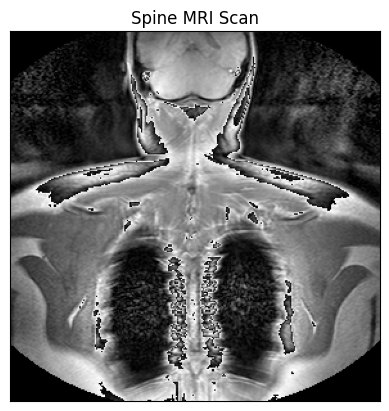

In [7]:
file_1_breast,array = display_image("IM000003.dcm","Spine MRI Scan")

Image Information:
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 192
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9328.50.51.132179165713680097957922976700142093823
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.27'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.9328.50.51.132179165713680097957922976700142093823
(0008, 0020) Study Date                          DA: '19911220'
(0008, 0023) Conten

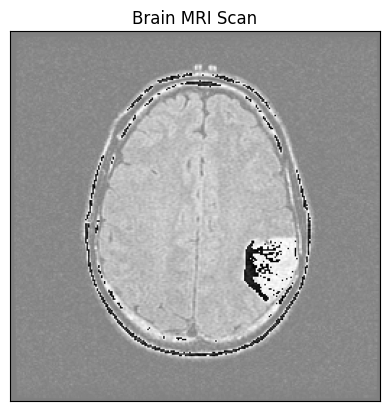

In [8]:
file_2_brain,sec_array = display_image("000002.dcm","Brain MRI Scan")

In [9]:
def merge_image(array_1,array_2):
    array_1 = cv2.resize(array_1,(800,600))
    array_2 = cv2.resize(array_2,(800,600))
    return np.concatenate([array_1 , array_2],axis=1)

In [10]:

new_array = merge_image(array,sec_array)

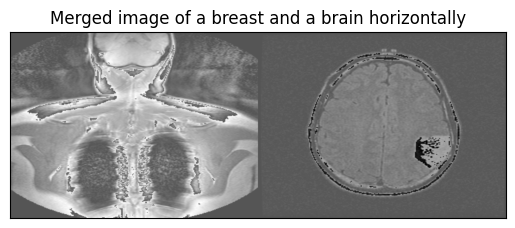

In [11]:
show_image(new_array,"Merged image of a breast and a brain horizontally")

In [12]:
def fourier_transform(image):
    fourier_shifted = np.fft.fft2(image)
    fshift = np.fft.fftshift(fourier_shifted)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum

In [13]:
magnitude_spectrum_breast = fourier_transform(array)

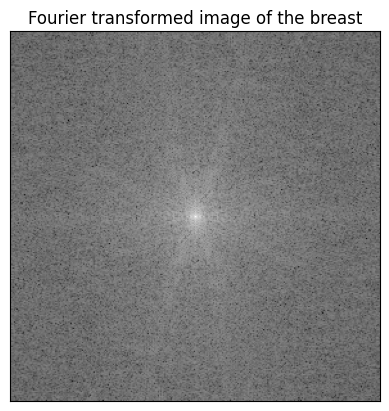

In [14]:
show_image(magnitude_spectrum_breast,"Fourier transformed image of the breast")

In [15]:
magnitude_spectrum_brain = fourier_transform(sec_array)

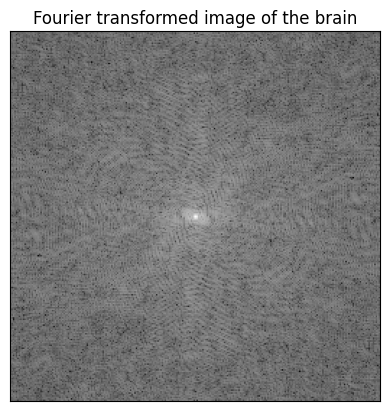

In [16]:
show_image(magnitude_spectrum_brain,"Fourier transformed image of the brain")

In [17]:
def edge_enhancement(image):
    image = np.uint8(image)
    edges = cv2.Canny(image,50,150)
    edge_enhance = cv2.dilate(edges,None,iterations = 2)
    return edge_enhance

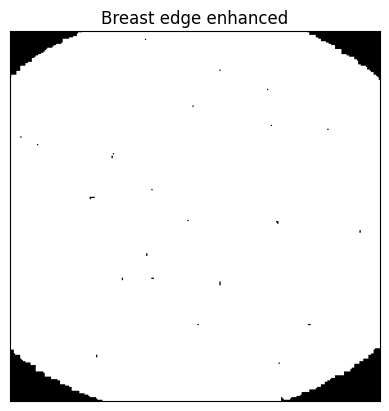

In [18]:
breast_edge = edge_enhancement(array)

show_image(breast_edge,"Breast edge enhanced")

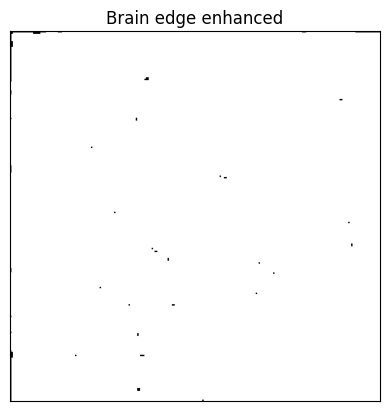

In [19]:
brain_edge = edge_enhancement(sec_array)
show_image(brain_edge,"Brain edge enhanced")

In [20]:
def rotate_45(image):
    center = (image.shape[0]//2,image.shape[1]//2)
    rotate_matrix = cv2.getRotationMatrix2D(center,45,1.0)
    new_image = cv2.warpAffine(image,rotate_matrix,(image.shape[1],image.shape[0]))
    return new_image

In [21]:
rotate_breast = rotate_45(array)

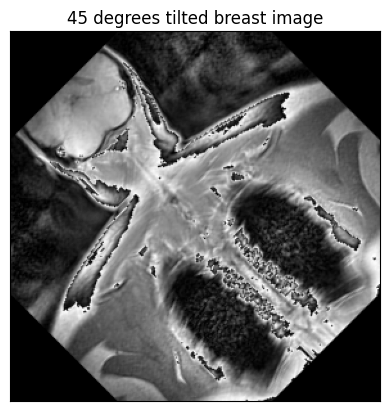

In [22]:
show_image(rotate_breast,"45 degrees tilted breast image")

In [23]:
rotate_brain = rotate_45(sec_array)

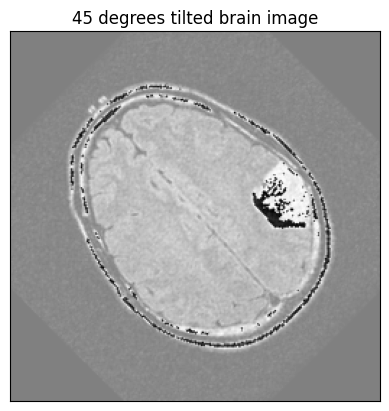

In [24]:
show_image(rotate_brain,"45 degrees tilted brain image")